# Madrdid Houses Dataset: Clean, EDA, Statistical Analysis, and Linear Regression

## Import Necessary Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random

## Load and Explore Data

In [2]:
path_to_data = 'Path/To/Madrid/Houses/.csv'

all_data = pd.read_csv(path_to_data)
all_data.shape

(21742, 58)

In [3]:
all_data.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parki

## 1. Data Cleaning

### Remove Null Values and Check for Duplicates

In [4]:
# Remove NaN values
# Check for duplicates
# Get specified columns for processing

In [5]:
# Remove NaN values
all_data = all_data.dropna(axis=1, how='all') # delete columns that are entierly null. # axis=1 --> columns, axis=0 --> rows
all_data.shape

(21742, 48)

In [6]:
# Check for duplicates
if all_data.duplicated().sum() > 0:
    all_data.drop_duplicates()
    print('Duplicates have been dropped.')

In [7]:
all_data.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'raw_address',
       'is_exact_address_hidden', 'street_name', 'street_number', 'floor',
       'is_floor_under', 'neighborhood_id', 'operation', 'rent_price',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'is_accessible', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_parking_included_in_price',
       'parking_price', 'is_orientation_north', 'is_orientation_west',
       'is_orientation_south', 'is_orientation_east'],
      dtype='object')

### Get Specified Columns for Processing

In [8]:
data = all_data[['id', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms', 'n_floors', 
                 'sq_mt_allotment', 'rent_price', 'buy_price', 'buy_price_by_area', 'built_year', 'parking_price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   sq_mt_useful       8228 non-null   float64
 4   n_rooms            21742 non-null  int64  
 5   n_bathrooms        21726 non-null  float64
 6   n_floors           1437 non-null   float64
 7   sq_mt_allotment    1432 non-null   float64
 8   rent_price         21742 non-null  int64  
 9   buy_price          21742 non-null  int64  
 10  buy_price_by_area  21742 non-null  int64  
 11  built_year         10000 non-null  float64
 12  parking_price      7719 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.2+ MB


### Process the Extracted Set

In [9]:
# some columns have a big number of null/missing values, therefore they are not useful and it is better to drop them
data = data.drop(columns=['sq_mt_useful', 'n_floors', 'sq_mt_allotment', 'built_year', 'parking_price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [10]:
# Rename subtitle to city
data.rename(columns={'subtitle': 'city'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   city               21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [11]:
data.n_rooms.describe()

count    21742.000000
mean         3.005749
std          1.510497
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: n_rooms, dtype: float64

In [12]:
# notice that min=0, some apartments have zero rooms which is incorrect
# Remove rows with 0 rooms
data.drop(data.index[data.n_rooms == 0], axis=0 , inplace=True)
data.shape

(21303, 8)

In [13]:
# Replace NaN values in n_bathrooms by the mode value of that column. 
# You always have three options: mean, median, mode. mode is the proper choice in this case.
n_bathrooms_mode = data.n_bathrooms.mode()
print('n_bathrooms_mode: ', n_bathrooms_mode)
data.n_bathrooms.fillna(n_bathrooms_mode, inplace=True)
# Replace zero entries with one
data.n_bathrooms.replace(0, 1)
data.sample(5)

n_bathrooms_mode:  0    1.0
Name: n_bathrooms, dtype: float64


C:\Users\Hussein\AppData\Local\Temp\ipykernel_20752\3460928853.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.n_bathrooms.fillna(n_bathrooms_mode, inplace=True)


,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
17201,4541,"Vista Alegre, Madrid",93.0,3,1.0,901,195000,2097
602,21140,"San Andrés, Madrid",110.0,4,1.0,913,199000,1809
1816,19926,"Casco Histórico de Vallecas, Madrid",80.0,2,2.0,733,147300,1841
924,20818,"El Cañaveral - Los Berrocales, Madrid",265.0,4,3.0,1300,340700,1286
14521,7221,"Bernabéu-Hispanoamérica, Madrid",257.0,4,5.0,-156000,2700000,10506


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21303 non-null  int64  
 1   city               21303 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21303 non-null  int64  
 4   n_bathrooms        21298 non-null  float64
 5   rent_price         21303 non-null  int64  
 6   buy_price          21303 non-null  int64  
 7   buy_price_by_area  21303 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [15]:
# Drop rows where sq_mt_built is NaN
data.dropna(subset=['sq_mt_built'], inplace=True)
data.shape

(21177, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21172 non-null  float64
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [17]:
data.sample(10)

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
10147,11595,"Apóstol Santiago, Madrid",84.0,2,2.0,1439,400000,4762
9472,12270,"Sanchinarro, Madrid",153.0,4,3.0,1989,640000,4183
10366,11376,"Virgen del Cortijo - Manoteras, Madrid",118.0,3,2.0,1885,595000,5042
1524,20218,"Casco Histórico de Vallecas, Madrid",100.0,3,1.0,956,212500,2125
2915,18827,"Cuzco-Castillejos, Madrid",63.0,2,2.0,780,160000,2540
8078,13664,"Argüelles, Madrid",53.0,1,1.0,1038,240000,4528
18613,3129,"Chueca-Justicia, Madrid",106.0,4,2.0,1596,469000,4425
16916,4826,"Opañel, Madrid",95.0,2,2.0,1213,305000,3211
17605,4137,"Centro, Madrid",87.0,2,2.0,1712,520000,5977
7710,14032,"Casa de Campo, Madrid",136.0,3,3.0,1758,540000,3971


In [18]:
# Change negative values in rent_price to zero
for value in data.rent_price.values:
    if value < 0:
        data.rent_price = 0

In [19]:
# To check if there are any negative rows left
data[data.rent_price < 0]

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area


In [20]:
data.sample(10)

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
2701,19041,"Berruguete, Madrid",250.0,4,5.0,0,625000,2500
19430,2312,"Goya, Madrid",124.0,3,2.0,0,650000,5242
10552,11190,"Sanchinarro, Madrid",161.0,4,3.0,0,836650,5197
4282,17460,"Pacífico, Madrid",150.0,4,2.0,0,510000,3400
6983,14759,"Moncloa, Madrid",285.0,5,4.0,0,745000,2614
3931,17811,"Niño Jesús, Madrid",167.0,4,2.0,0,1050000,6287
16369,5373,"Puerta Bonita, Madrid",110.0,3,1.0,0,220000,2000
11363,10379,"Nuevos Ministerios-Ríos Rosas, Madrid",65.0,2,1.0,0,299000,4600
18424,3318,"Lavapiés-Embajadores, Madrid",83.0,2,1.0,0,349000,4205
1723,20019,"Villa de Vallecas, Madrid",96.0,1,1.0,0,164000,1708


In [21]:
# split city column into district and city. City is always Madrid, so exclude it from columns and keep district only
data['district'] = data.city.str.split(',', expand=True)[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21172 non-null  float64
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
 8   district           21177 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.6+ MB


In [22]:
data.columns

Index(['id', 'city', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price',
       'buy_price', 'buy_price_by_area', 'district'],
      dtype='object')

In [23]:
data = data[['id',  'district', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price', 'buy_price', 'buy_price_by_area']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   district           21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21172 non-null  float64
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [24]:
data.sample(5)

,id,district,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
6461,15281,Latina,127.0,4,2.0,0,290000,2283
19902,1840,Barrio de Salamanca,124.0,2,2.0,0,1110000,8952
10798,10944,Pinar del Rey,83.0,3,2.0,0,292000,3518
12969,8773,Colina,345.0,5,4.0,0,1375000,3986
15027,6715,Prosperidad,135.0,4,3.0,0,785000,5815


### Re-Explore the dataset and understand the remaining columns

In [25]:
all_data.sample(5)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
15530,15530,6212,Piso en venta en calle de Canillas,"Prosperidad, Madrid",74.0,61.0,3,1.0,NaN,NaN,...,NaN,NaN,E,False,NaN,NaN,NaN,NaN,NaN,NaN
13369,13369,8373,"Piso en venta en calle de Emilio Vargas, 18","San Juan Bautista, Madrid",130.0,NaN,2,1.0,NaN,NaN,...,True,True,no indicado,True,True,0.0,NaN,NaN,NaN,NaN
4996,4996,16746,Casa o chalet independiente en venta en calle...,"Entrevías, Madrid",69.0,NaN,2,1.0,NaN,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
17654,17654,4088,"Piso en venta en calle de Lepanto, 4","Palacio, Madrid",152.0,NaN,2,2.0,NaN,NaN,...,NaN,NaN,D,False,NaN,NaN,NaN,NaN,NaN,NaN
1533,1533,20209,Piso en venta en camino de la Suerte,"Casco Histórico de Vallecas, Madrid",51.0,NaN,2,1.0,NaN,NaN,...,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
all_data.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'raw_address',
       'is_exact_address_hidden', 'street_name', 'street_number', 'floor',
       'is_floor_under', 'neighborhood_id', 'operation', 'rent_price',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony',
       'has_storage_room', 'is_accessible', 'has_green_zones',
       'energy_certificate', 'has_parking', 'is_parking_included_in_price',
       'parking_price', 'is_orientation_north', 'is_orientation_west',
       'is_orientation_south', 'is_orientation_east'],
      dtype='object')

In [27]:
all_data[[ 'raw_address','is_exact_address_hidden', 'street_name' ]].info()
# it is obvious that these three column contain high amount of null values and therefore they will not adding value to future analysis, keep them out of consideration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   raw_address              16277 non-null  object
 1   is_exact_address_hidden  21742 non-null  bool  
 2   street_name              15837 non-null  object
dtypes: bool(1), object(2)
memory usage: 361.1+ KB


In [28]:
all_data.operation.unique()

array(['sale'], dtype=object)

In [29]:
all_data.is_buy_price_known.unique() # this indicates that the buy price is known, and the numeric values in the buy_price column are true and expressive 

array([ True])

In [30]:
all_data.is_rent_price_known.unique() # it has only False value, this indicate that the rent price might not be true and therefore it has no real importance and can be dropped

array([False])

In [31]:
# Drop rent_price column from data
data = data.drop(columns=['rent_price'])

In [32]:
all_data[['house_type_id', 'is_new_development']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_type_id       21351 non-null  object
 1   is_new_development  20750 non-null  object
dtypes: object(2)
memory usage: 339.8+ KB


### Export the final result into a .CSV file

In [33]:
# final resutl
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   district           21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21172 non-null  float64
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.3+ MB


In [34]:
data.sample(5)

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
741,21001,Villaverde,76.0,3,1.0,107300,1412
12348,9394,Vallehermoso,163.0,4,2.0,589000,3613
16668,5074,Pau de Carabanchel,90.0,2,2.0,295000,3278
5696,16046,Palomeras Bajas,79.0,2,1.0,119000,1506
12224,9518,Gaztambide,113.0,3,2.0,1168362,10339


In [35]:
# save final resutls

path_to_result = 'Path/To/Madrid/Houses/Final/Result.csv'

data.to_csv(path_to_result)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   district           21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21172 non-null  float64
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.3+ MB


# 2. EDA: Exploratory Data Analysis

### Histogram and Boxenplot

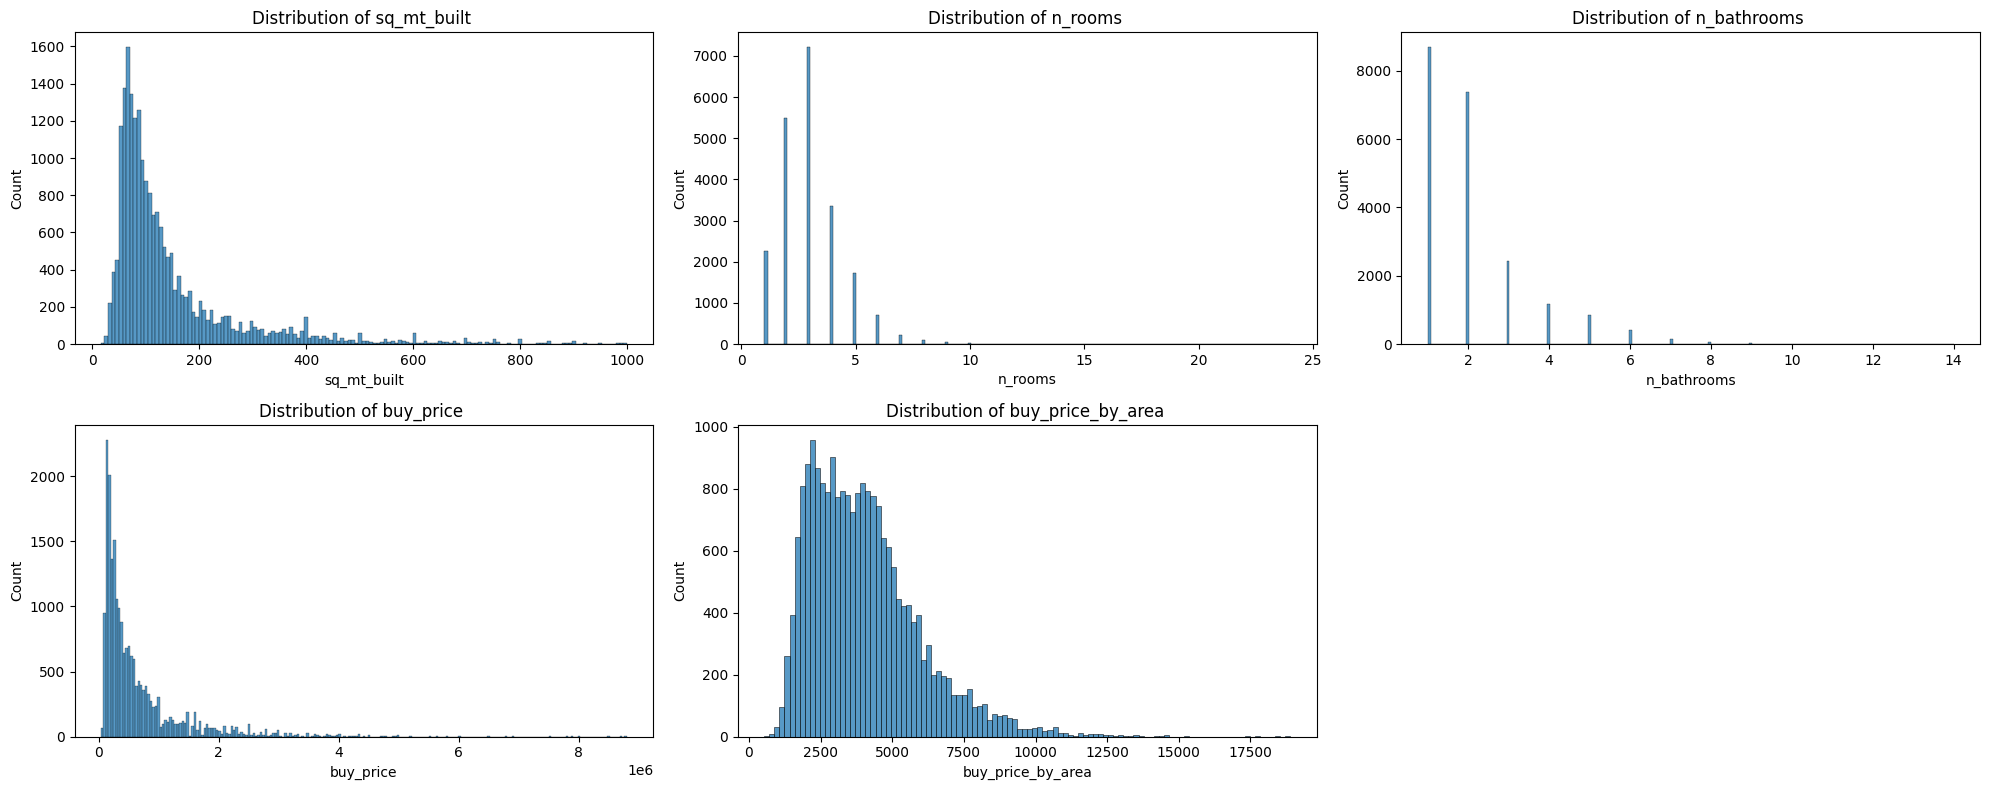

In [37]:
# Numerical columns
plt.figure(figsize=(20,8))
for i, col_name in enumerate(data.columns[2:]):
    plt.subplot(2, 3, i+1)
    plt.title(f'Distribution of {col_name} ')
    sns.histplot(data=data[col_name])
    plt.tight_layout()


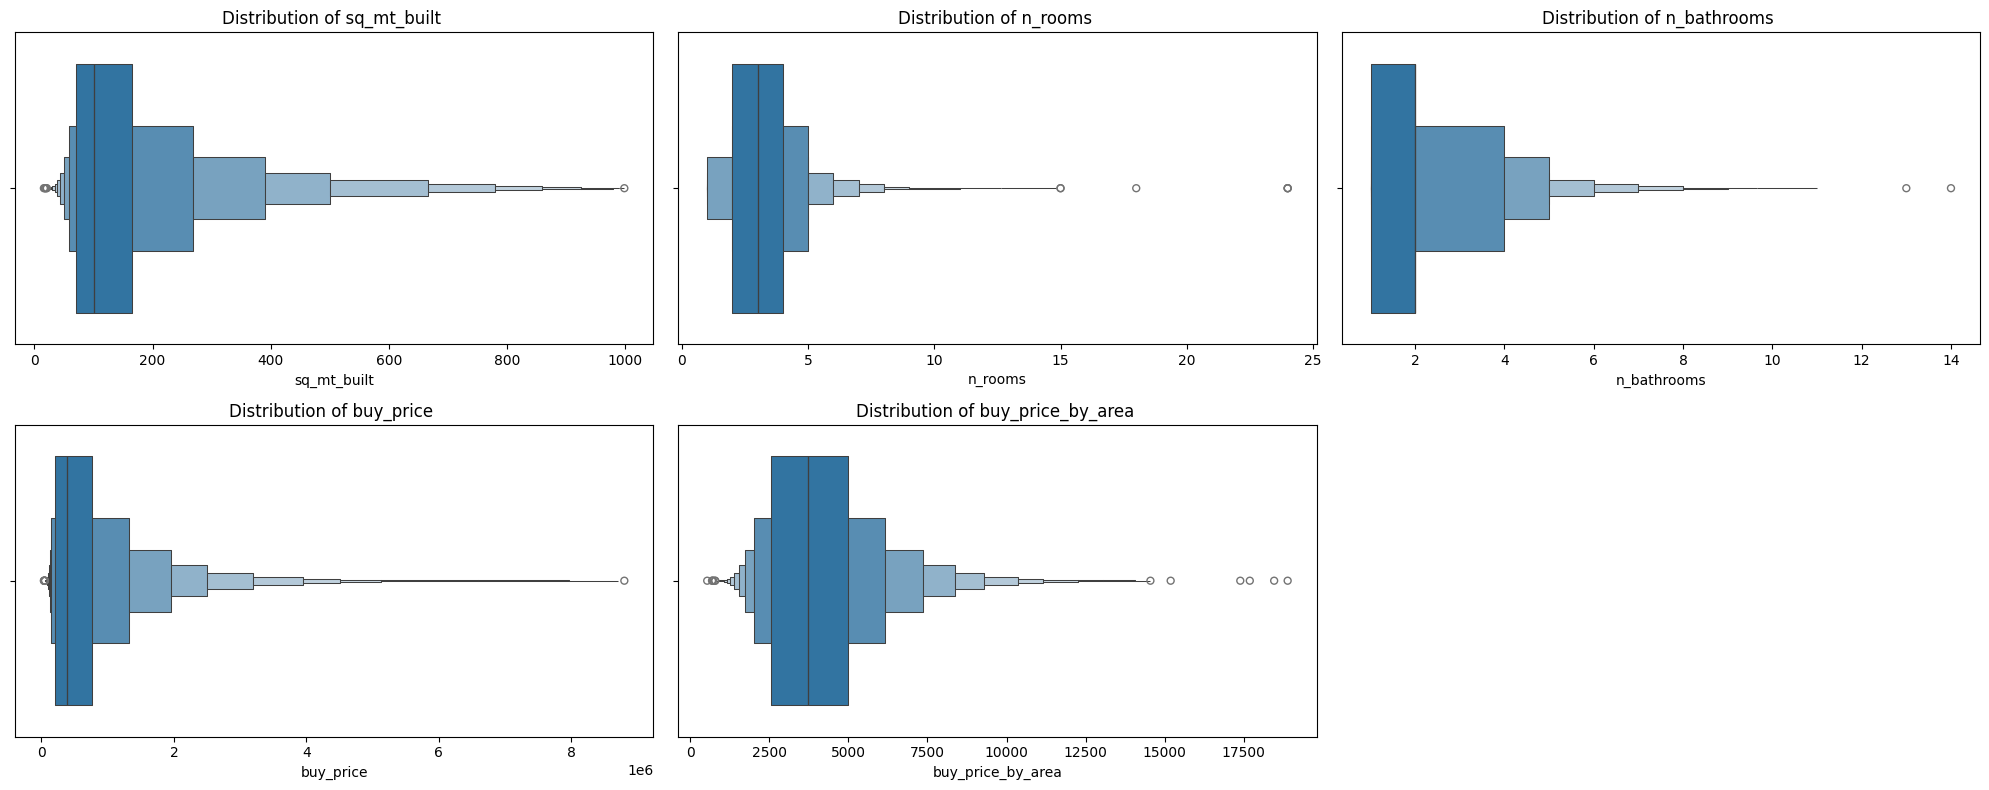

In [38]:
# Numerical columns
plt.figure(figsize=(20,8))
for i, col_name in enumerate(data.columns[2:]):
    plt.subplot(2, 3, i+1)
    plt.title(f'Distribution of {col_name} ')
    sns.boxenplot(x=data[col_name])
    plt.tight_layout()


In [39]:
px.bar(data_frame=data.district.value_counts(), title='Distribution of Districts in Madrid')

# 3. Statistical Analysis

### Correlation Coefficient: Bivariate Analysis

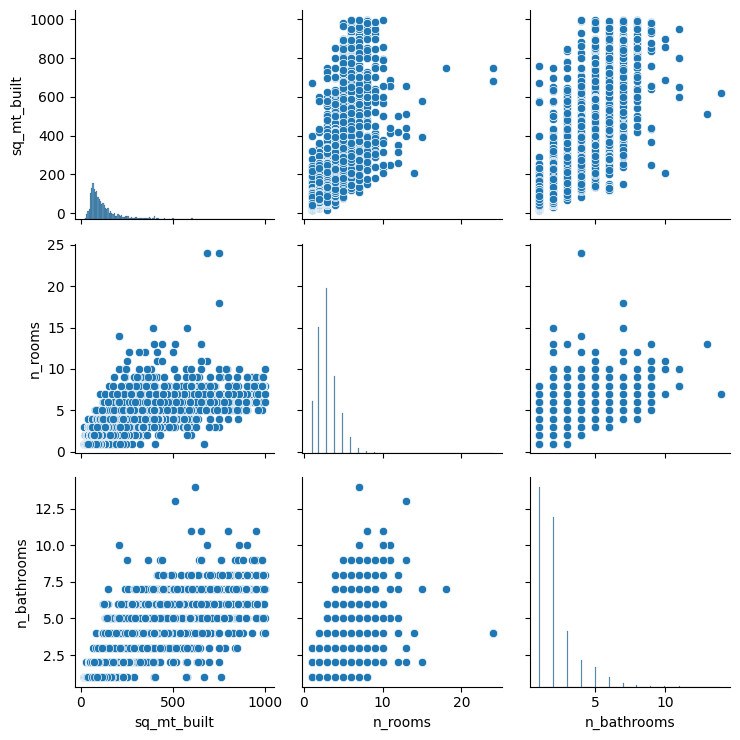

In [40]:
corr_data = data[['sq_mt_built', 'n_rooms', 'n_bathrooms']]

sns.pairplot(corr_data)
plt.tight_layout()

Text(0.5, 1.0, 'Corrleation between: Area (sqm), #Rooms, #Bathrooms')

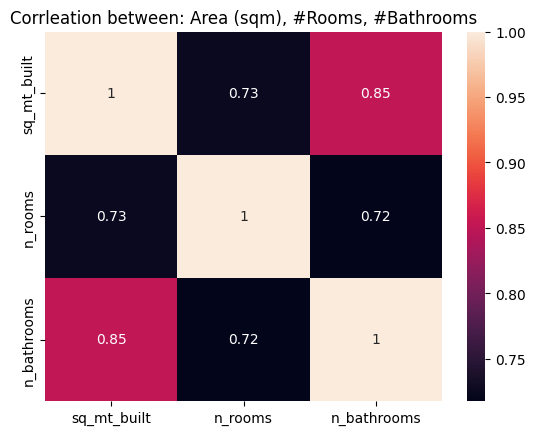

In [41]:
# For an easier understanding of the correlation between these three quantities, we construct a heatmap
sns.heatmap(corr_data.corr(), annot=True)
plt.title('Corrleation between: Area (sqm), #Rooms, #Bathrooms')


In [42]:
# Translation of the heatmap:
# diagonal entries are the correlation between the quantities and themselves, and therefore useless
# Lower off-diagonal entries are expressive and indicate that the relationship between three quantities is very strong (positive); 0.7 to 1
# Upper off-diagonal entries are the reflection of lower off-diagonal entries and can be neglected

Text(0.5, 1.0, 'Corrleation between: Buy Price, Area (sqm), #Rooms, #Bathrooms')

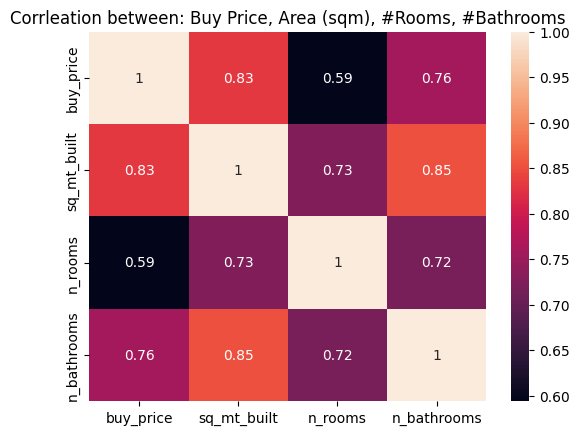

In [43]:
# To find out the feature that has the strongest relationship (correlation) with the target of buy_price, we construct the following heatmap
corr_data = data[['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms' ]]
sns.heatmap(corr_data.corr(), annot=True)
plt.title('Corrleation between: Buy Price, Area (sqm), #Rooms, #Bathrooms')


In [44]:
# with a correlation coefficient of 0.83 between buy price and area (m2), we can say that it has the strongest relationship.

In [45]:
data.head()

,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.0,2,1.0,85000,1328
1,21741,Los Ángeles,70.0,3,1.0,129900,1856
2,21740,San Andrés,94.0,2,2.0,144247,1535
3,21739,San Andrés,64.0,2,1.0,109900,1717
4,21738,Los Rosales,108.0,2,2.0,260000,2407


### Location or Size: What influences House Prices in Madrid? 
    Do housing prices vary by district? If so, which are the most expensive districts for purchasing a house?

<Axes: title={'center': 'Mean Price by District'}, xlabel='District', ylabel='Mean Price'>

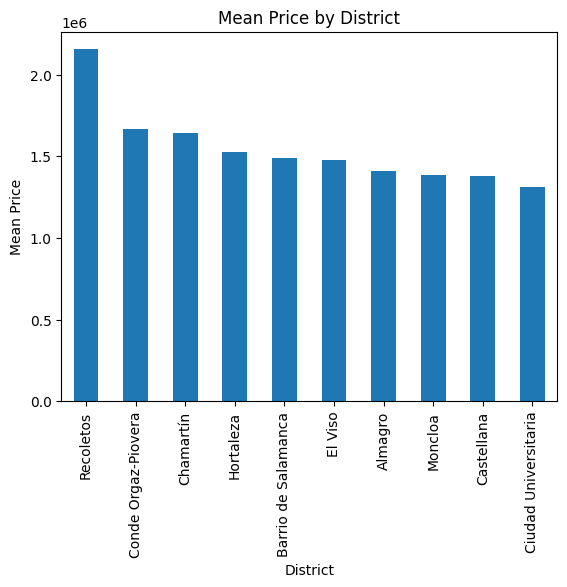

In [46]:
mean_price = data.groupby('district')['buy_price'].mean().sort_values(ascending=False)
mean_price.head(10).plot(kind='bar', xlabel='District', ylabel='Mean Price', title='Mean Price by District')

<Axes: title={'center': 'Mean Price by District'}, xlabel='District', ylabel='Mean Price'>

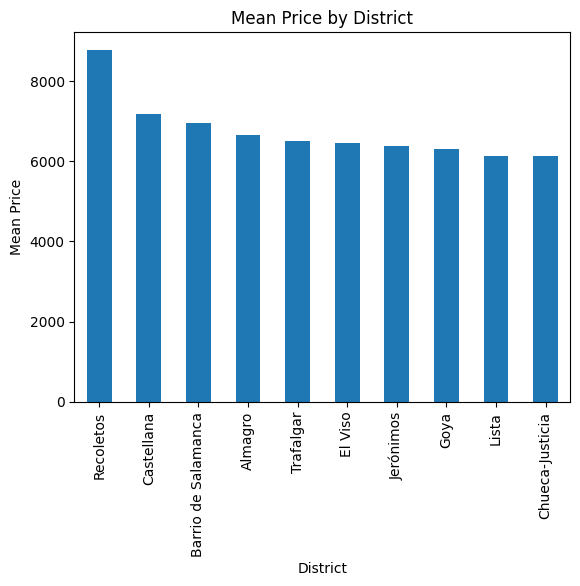

In [47]:
mean_price = data.groupby('district')['buy_price_by_area'].mean().sort_values(ascending=False)
mean_price.head(10).plot(kind='bar', xlabel='District', ylabel='Mean Price', title='Mean Price by District')

In [48]:
# from the second bar chart, the districts of Recoletos, Castellana, Barrio de Salamanca are all in the district of Salamanca
#  which is one of the wealthiest and most expensive for living in Madrid.
# This means that ordering by buy_price_by_area is more accurate and can be used over buy_price.

In [49]:
recoletos = data.query('district == "Recoletos" ')
recoletos.dropna(inplace=True)
recoletos.sample(10)

C:\Users\Hussein\AppData\Local\Temp\ipykernel_20752\1160102378.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,district,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
20138,1604,Recoletos,300.0,5,3.0,2100000,7000
19789,1953,Recoletos,72.0,2,2.0,750000,10417
19824,1918,Recoletos,312.0,4,5.0,2500000,8013
19979,1763,Recoletos,349.0,5,3.0,2490000,7135
20090,1652,Recoletos,343.0,3,4.0,2900000,8455
19750,1992,Recoletos,226.0,5,2.0,1550000,6858
19598,2144,Recoletos,220.0,4,6.0,2400000,10909
20137,1605,Recoletos,236.0,4,3.0,1950000,8263
19151,2591,Recoletos,467.0,6,5.0,4200000,8994
19691,2051,Recoletos,247.0,2,3.0,2200000,8907


In [50]:
recoletos.shape

(112, 7)

# 4. Linear Regression

## Use Linear Regression to predict the price per square meter in Recoletos, Madrid

In [51]:
import statsmodels.api as sm
recoletos['intercept'] = 1

# We use OLS: Ordinary Least Squares method for regression
linear_model = sm.OLS(recoletos['buy_price'], recoletos[['intercept', 'sq_mt_built']])
result = linear_model.fit()
result.summary()

C:\Users\Hussein\AppData\Local\Temp\ipykernel_20752\2564200851.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     542.0
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.59e-44
Time:                        21:39:12   Log-Likelihood:                -1639.9
No. Observations:                 112   AIC:                             3284.
Df Residuals:                     110   BIC:                             3289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    -3.85e+04   1.09e+05     -0.355      0.723   -2.54e+05    1.77e+05
sq_mt_built  8961.9570    384.960     23.280      0.000    8199.057    9724.857
==============================================================================
Omnibus:                       11.298   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.540
Skew:                           0.512   Prob(JB):                     0.000422
Kurtosis:                       4.510   Cond. No.                         580.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the linear regression we performed, we can see that:
    'Dep. Variable:	buy_price	R-squared:	0.833'
    this means that 83.3% of 'buy_price' variable is affected by the area in m2, where R-squared referes to the correlation coefficient,
    'buy_price' is the dependent variable and 'sq_mt_built' or area (m2) is the independent variable. 

	        	coef	        P>|t|	
intercept   	-3.85e+04		0.723	
sq_mt_built		8961.9570		0.000	


coefficient of intercept = -38500

the P-value with respect to the 'sq_mt_built' is 0, meaning this variable is statistically useful to study/determine/know the buy price
Furthermore, according to this regression, the output coefficient suggests that the price per 1 square meter in Recoletos is expected to be 8961.9570€

This is very useful if we want to predict the price of an apartment in this district if we know its area using the following equation:

y = b0 + b1 * x
target = intercept + slope * feature


In [52]:
area = 300
# price = coefficient of intercept + coefficient of sq_mt_built * area
price = -38500 + 8961 * area

print("Predicted price of Flat in Recoletos with an area of {} m2 = {} €".format(area, price))

Predicted price of Flat in Recoletos with an area of 300 m2 = 2649800 €


Text(0.5, 1.0, 'Corrleation between: Buy Price, Area (sqm), #Rooms, #Bathrooms')

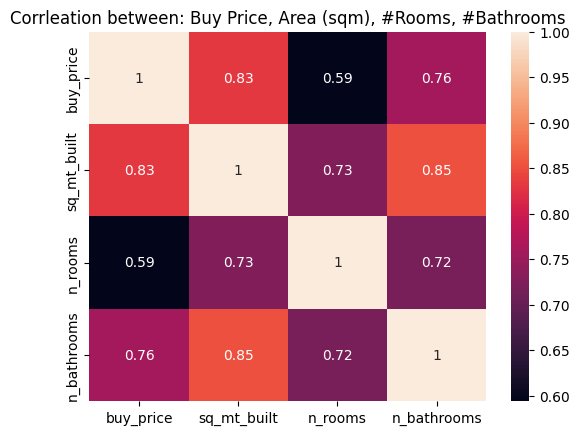

In [53]:
corr_data = data[['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms' ]]
sns.heatmap(corr_data.corr(), annot=True)
plt.title('Corrleation between: Buy Price, Area (sqm), #Rooms, #Bathrooms')

In [54]:
# since there is strong corrleation between buy_price and sq_mt_built as well as buy_price and n_bathrooms, we want to study the accuracy of the regression model when both
# sq_mt_built and n_bathrooms are taken into consideration as two features instead of single feature as before
# this is known as multi-linear regression

In [55]:
# We use OLS: Ordinary Least Squares method for regression
linear_model = sm.OLS(recoletos.buy_price, recoletos[['intercept', 'sq_mt_built','n_bathrooms']])
result = linear_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     295.2
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           1.01e-44
Time:                        21:39:12   Log-Likelihood:                -1635.5
No. Observations:                 112   AIC:                             3277.
Df Residuals:                     109   BIC:                             3285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -2.118e+05    1.2e+05     -1.770      0.080   -4.49e+05    2.54e+04
sq_mt_built  7861.6490    522.266     15.053      0.000    6826.534    8896.764
n_bathrooms  1.439e+05    4.8e+04      2.999      0.003    4.88e+04    2.39e+05
==============================================================================
Omnibus:                       23.283   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.455
Skew:                           0.695   Prob(JB):                     1.01e-14
Kurtosis:                       6.446   Cond. No.                         677.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                coef		    P>|t|	
intercept	    -2.118e+05		0.080	
sq_mt_built	    7861.6490		0.000	
n_bathrooms	    1.439e+05		0.003	


In [56]:
# y = b0 + (b1 * x1) + (b2 * x2)
# price = coefficient of intercept + (coefficient of sq_mt_built * area) + (coefficient of n_bathrooms * n_bath)

area = 300
n_bath = 2
price = -211800 + (7861 * area) + (143900 * n_bath)

print("Predicted price of Flat in Recoletos with an area of {} m2 and {} bathrooms = {} €".format(area, n_bath, price))

Predicted price of Flat in Recoletos with an area of 300 m2 and 2 bathrooms = 2434300 €


### This function is to allow the user to input a district name, area, and number of bathrooms, ... 

In [57]:
def predict_price(district_name, dependent_features=[], dependent_values=[]):

    if len(dependent_features) != len(dependent_values):
        print('Please Specify Correct Features & Values Input..')

    else:
        district_data = data.query(f'district == "{district_name}"')
        district_data = district_data.dropna()

        # Add intercept column
        district_data.insert(0, 'intercept', value=1)
        dependent_features.insert(0, 'intercept')

        # Ordinary Least Squares regression
        linear_model = sm.OLS(district_data['buy_price'], district_data[dependent_features])
        result = linear_model.fit()

        b0 = result.params.iloc[0]   # returns inception coefficient
        result = result.params.iloc[1:] # returns dependent feature coefficient except for inception
        price = b0

        # Calculate predicted price
        for b, x in zip(result, dependent_values):
            price += (b*x)

        print(f"Predicted price of Flat in {district_name} = {price:,.0f} €")


#### Output Example:

In [58]:
predict_price(district_name='Almagro', dependent_features=['sq_mt_built', 'n_bathrooms'], dependent_values=[300, 2])

Predicted price of Flat in Almagro = 1,831,717 €


In [59]:
predict_price(district_name='Goya', dependent_features=['sq_mt_built', 'n_bathrooms', 'n_rooms'], dependent_values=[300, 2, 4])

Predicted price of Flat in Goya = 1,880,353 €


In [60]:
predict_price(district_name='Lista', dependent_features=['sq_mt_built', 'n_bathrooms'], dependent_values=[300, 2])

Predicted price of Flat in Lista = 1,592,954 €


In [61]:
predict_price(district_name='Recoletos', dependent_features=['sq_mt_built', 'n_bathrooms'], dependent_values=[600, 2])

Predicted price of Flat in Recoletos = 4,792,891 €


### Feel free to try your own choices

In [62]:
data['district'].unique()

array(['San Cristóbal', 'Los Ángeles', 'San Andrés', 'Los Rosales',
       'Villaverde', 'Butarque', 'Vicálvaro', 'Ambroz',
       'Casco Histórico de Vicálvaro', 'El Cañaveral - Los Berrocales',
       'Valdebernardo - Valderribas', 'Casco Histórico de Vallecas',
       'Ensanche de Vallecas - La Gavia', 'Villa de Vallecas',
       'Santa Eugenia', 'Orcasitas', 'Usera', 'San Fermín', 'Pradolongo',
       'Zofío', 'Almendrales', 'Moscardó', '12 de Octubre-Orcasur',
       'Valdeacederas', 'Tetuán', 'Berruguete', 'Cuatro Caminos',
       'Cuzco-Castillejos', 'Bellas Vistas', 'Ventilla-Almenara',
       'Retiro', 'Adelfas', 'Ibiza', 'Pacífico', 'Niño Jesús',
       'Jerónimos', 'Estrella', 'Puente de Vallecas', 'Palomeras Bajas',
       'San Diego', 'Palomeras sureste', 'Entrevías', 'Numancia',
       'Portazgo', 'Aravaca', 'Argüelles', 'Moncloa',
       'Ciudad Universitaria', 'Valdezarza', 'Fontarrón', 'Moratalaz',
       'Vinateros', 'Marroquina', 'Media Legua', 'Horcajo', 'Pavones',


In [74]:
random_district = random.choice(data['district'].unique())

predict_price(district_name=random_district, dependent_features=['sq_mt_built', 'n_bathrooms'], dependent_values=[600, 2])

Predicted price of Flat in Conde Orgaz-Piovera = 1,759,301 €
